In [26]:
import os
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [27]:
ALPHA = '0.13'
P1_folder = '../../results-demo/public/data/param-ee-linear-{}'.format(ALPHA)
P2_folder = '../../results-demo/public/data/param-ee-quadratic-{}'.format(ALPHA)


In [28]:
# Read all graph names
graphs_file_path = os.path.join(P1_folder, 'graphs.txt')
graph_names = [l.strip() for l in open(graphs_file_path)]
# pprint(graph_names)

In [29]:
df_arr = []

for g in graph_names:
    res_path = os.path.join(P1_folder, g + '_result.json')
    res1 = json.load(open(res_path))
    res_path = os.path.join(P2_folder, g + '_result.json')
    res2 = json.load(open(res_path))
    df_arr.append({
        'layout': g,
        'P1 (linear)': res1['metrics']['ee']['total_penalty'], 
        'P2 (quadratic)': res2['metrics']['ee']['total_penalty']
    })


In [30]:
d = pd.DataFrame(df_arr, columns=['layout', 'P1 (linear)', 'P2 (quadratic)'])

In [31]:
d['ratio'] = d['P1 (linear)'] / d['P2 (quadratic)']

In [32]:
d.sort_values('ratio')

,layout,P1 (linear),P2 (quadratic),ratio
30,Progression-ee-glancing,3.340241e+00,5.251465e+00,0.636059
27,progression-ee-ortho,4.415064e-01,6.422886e-01,0.687396
29,progression-ee-near-glancing,2.888051e+00,3.942519e+00,0.732540
35,coauthor-main-comp-grouseflocks-2,4.936255e+03,6.544835e+03,0.754221
24,progression-ne-some-meta,5.862139e+01,7.461319e+01,0.785671
17,progression-nn-some-leaf,2.793408e+01,3.518147e+01,0.794000
19,progression-nn-near-max-leaf,2.796475e+01,3.511805e+01,0.796307
25,progression-ne-near-max-leaf,3.024034e+01,3.730802e+01,0.810559
22,progression-ne-touch-meta,5.024102e+01,6.175846e+01,0.813508
23,progression-ne-some-leaf,3.107323e+01,3.790266e+01,0.819817


In [33]:
d['ratio'].describe()

count    51.000000
mean      0.896161
std       0.114958
min       0.636059
25%       0.828162
50%       0.868954
75%       0.929748
max       1.137861
Name: ratio, dtype: float64

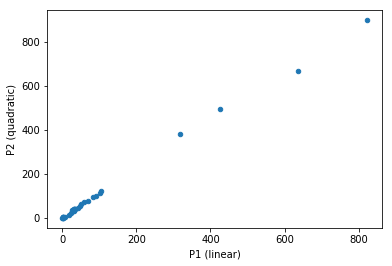

In [34]:
# Draw a scatterplot: x is the linear penalty and y is quadratic penalty
plt.figure()
d[d['P1 (linear)'] < 1000].plot.scatter(x='P1 (linear)', y='P2 (quadratic)')

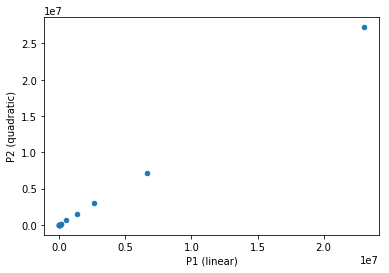

In [35]:
d[d['P1 (linear)'] > 1000].plot.scatter(x='P1 (linear)', y='P2 (quadratic)')

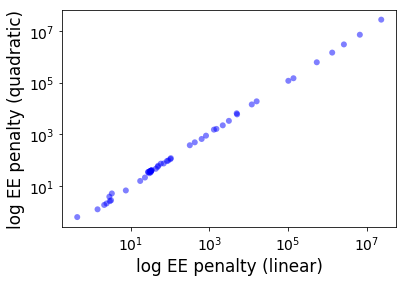

In [52]:
plt.rcParams.update({'font.size': 14, 'font.serif': 'Times'})

fig = plt.figure()
ax = plt.gca()
ax.scatter(d['P1 (linear)'] ,d['P2 (quadratic)'] , c='blue', alpha=0.50, edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('log EE penalty (linear)', fontsize='large')
ax.set_ylabel('log EE penalty (quadratic)', fontsize='large')


# d.plot(x='P1 (linear)', y='P2 (quadratic)', kind='scatter', loglog=True, fontsize=12)
plt.savefig('../../../images/linear-vs-quad.eps', bbox_inches='tight', pad_inches=0.05)

In [57]:
from scipy.stats.stats import pearsonr, linregress

In [55]:
pearsonr(d['P1 (linear)'] ,d['P2 (quadratic)'])

(0.9997260535944853, 1.4168550915168916e-81)

In [58]:
linregress(d['P1 (linear)'] ,d['P2 (quadratic)'])

LinregressResult(slope=1.1742118846464484, intercept=-11967.577196918428, rvalue=0.99972605359448541, pvalue=1.4168550915028081e-81, stderr=0.0039272222266761884)